### Initialization

In [1]:
import qcodes as qc
from qcodes.instrument import Instrument, ManualParameter
from qcodes.station import Station

from metainstruments.ZCUStation import ZCU216Station
from metainstruments.ZCUMetainstrument import ZCU216Metainstrument
from measurements.Protocols import Protocol
from measurements.T1Protocol import T1Protocol
from measurements.PulseProbeSpectroscopyProtocol import PulseProbeSpectroscopyProtocol


from qick import *

import numpy as np
import matplotlib.pyplot as plt

#Initializing the station and the database
qc.initialise_or_create_database_at("./experiment-data/zcu_test_data.db")
station = ZCU216Station()

station.add_DAC_channel(name="QubitChannel", channel=6)
station.add_DAC_channel(name="ReadoutChannel", channel=4)
station.add_ADC_channel(name="ADC", channel=0)

station.add_protocol(T1Protocol(name='t1p'))

In [2]:
t1p = station.measure_iq(params_and_values = {station.t1p.variable_delay: [0,5,2], station.QubitChannel.pulse_gain: [10, 200, 4], station.QubitChannel.pulse_freq: [100, 500, 3]}, 
                         protocol = station.t1p, 
                         dac_channels = {'qubit': station.QubitChannel,'readout': station.ReadoutChannel},
                         adc_channels = {'adc' : station.ADC} )

Starting experimental run with id: 1330. 


In [2]:
station.add_protocol(PulseProbeSpectroscopyProtocol(name='PPSP'))

In [4]:
t1p = station.measure_iq(params_and_values = {station.QubitChannel.pulse_gain: [10, 200, 4], station.QubitChannel.pulse_freq: [100, 500, 3]}, 
                         protocol = station.PPSP, 
                         dac_channels = {'qubit': station.QubitChannel,'readout': station.ReadoutChannel},
                         adc_channels = {'adc' : station.ADC} )

Starting experimental run with id: 1335. 


### Testing

In [5]:
datase2 = qc.load_by_id(t1p).to_xarray_dataset()

/usr/local/share/pynq-venv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
datase2

<xarray.Dataset>
Dimensions:                  (QubitChannel_pulse_freq: 4,
                              QubitChannel_pulse_gain: 3)
Coordinates:
  * QubitChannel_pulse_freq  (QubitChannel_pulse_freq) float64 10.0 ... 200.0
  * QubitChannel_pulse_gain  (QubitChannel_pulse_gain) float64 100.0 233.3 366.7
Data variables:
    avg_i                    (QubitChannel_pulse_freq, QubitChannel_pulse_gain) float64 ...
    avg_q                    (QubitChannel_pulse_freq, QubitChannel_pulse_gain) float64 ...
Attributes: (12/14)
    ds_name:                  results
    sample_name:              Herja
    exp_name:                 zcu_qcodes_test
    snapshot:                 {"station": {"instruments": {"zcu": {"functions...
    guid:                     aaaaaaaa-0000-0000-0000-018b47cc8c22
    run_timestamp:            2023-10-19 11:57:49
    ...                       ...
    captured_counter:         100
    run_id:                   1335
    run_description:          {"version": 3, "interdependencies": {"paramspec...
    parent_dataset_links:     []
    run_timestamp_raw:        1697716669.7296836
    completed_timestamp_raw:  1697716669.902785

In [12]:
station.print_configuration()

Station configuration:


zcu:
	parameter value
--------------------------------------------------------------------------------
IDN :	{'vendor': None, 'model': 'zcu', 'serial': None, 'firmware': None} 

QubitChannel:
	parameter   value
--------------------------------------------------------------------------------
IDN          :	{'vendor': None, 'model': 'QubitChannel', 'serial': None, 'fir...
channel      :	6 
nqz          :	1 
pulse_freq   :	500 (MHz)
pulse_gain   :	5000 (DAC units)
pulse_length :	10 (us)
pulse_phase  :	0 (deg)

ReadoutChannel:
	parameter   value
--------------------------------------------------------------------------------
IDN          :	{'vendor': None, 'model': 'ReadoutChannel', 'serial': None, 'f...
channel      :	4 
nqz          :	1 
pulse_freq   :	500 (MHz)
pulse_gain   :	5000 (DAC units)
pulse_length :	10 (us)
pulse_phase  :	0 (deg)

ADC:
	parameter   value
--------------------------------------------------------------------------------
IDN          :	{'ven

In [7]:
t1p = station.measure_iq(params_and_values = {station.t1p.variable_delay: [0,300,500]}, protocol = T1Protocol(), dac_channels = {'qubit': station.QubitChannel,'readout': station.ReadoutChannel}, adc_channels = {'adc' : station.ADC} )

Starting experimental run with id: 1236. 
[(<qcodes.instrument.parameter.ManualParameter: variable_delay at 281472371918688>, [400, 500])]


In [9]:
testdata = qc.load_by_id(t1p).to_xarray_dataset()

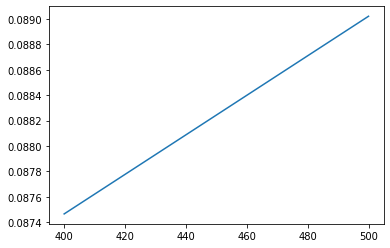

In [10]:
plt.plot(testdata["delay_time"], abs(testdata["avg_q"]+1j*testdata["avg_i"]))


## 

In [9]:
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,200]}, protocol = NDSweepProtocol())
heja1 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1216. 


In [6]:
station.zcu.nqz(2)
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja2 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1213. 


In [30]:
station.zcu.nqz(1)
station.zcu.qubit_ch(4)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja3 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1196. 


In [31]:
station.zcu.nqz(2)
station.zcu.qubit_ch(4)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja4 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1197. 


In [34]:
station.zcu.nqz(1)
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja5 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1200. 


In [33]:
station.zcu.nqz(2)
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja6 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1199. 


In [35]:
station.zcu.nqz(1)
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja7 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1201. 


In [36]:
station.zcu.nqz(2)
station.zcu.qubit_ch(6)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
heja8 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1202. 


In [48]:
plt.rcParams['figure.dpi']= 300

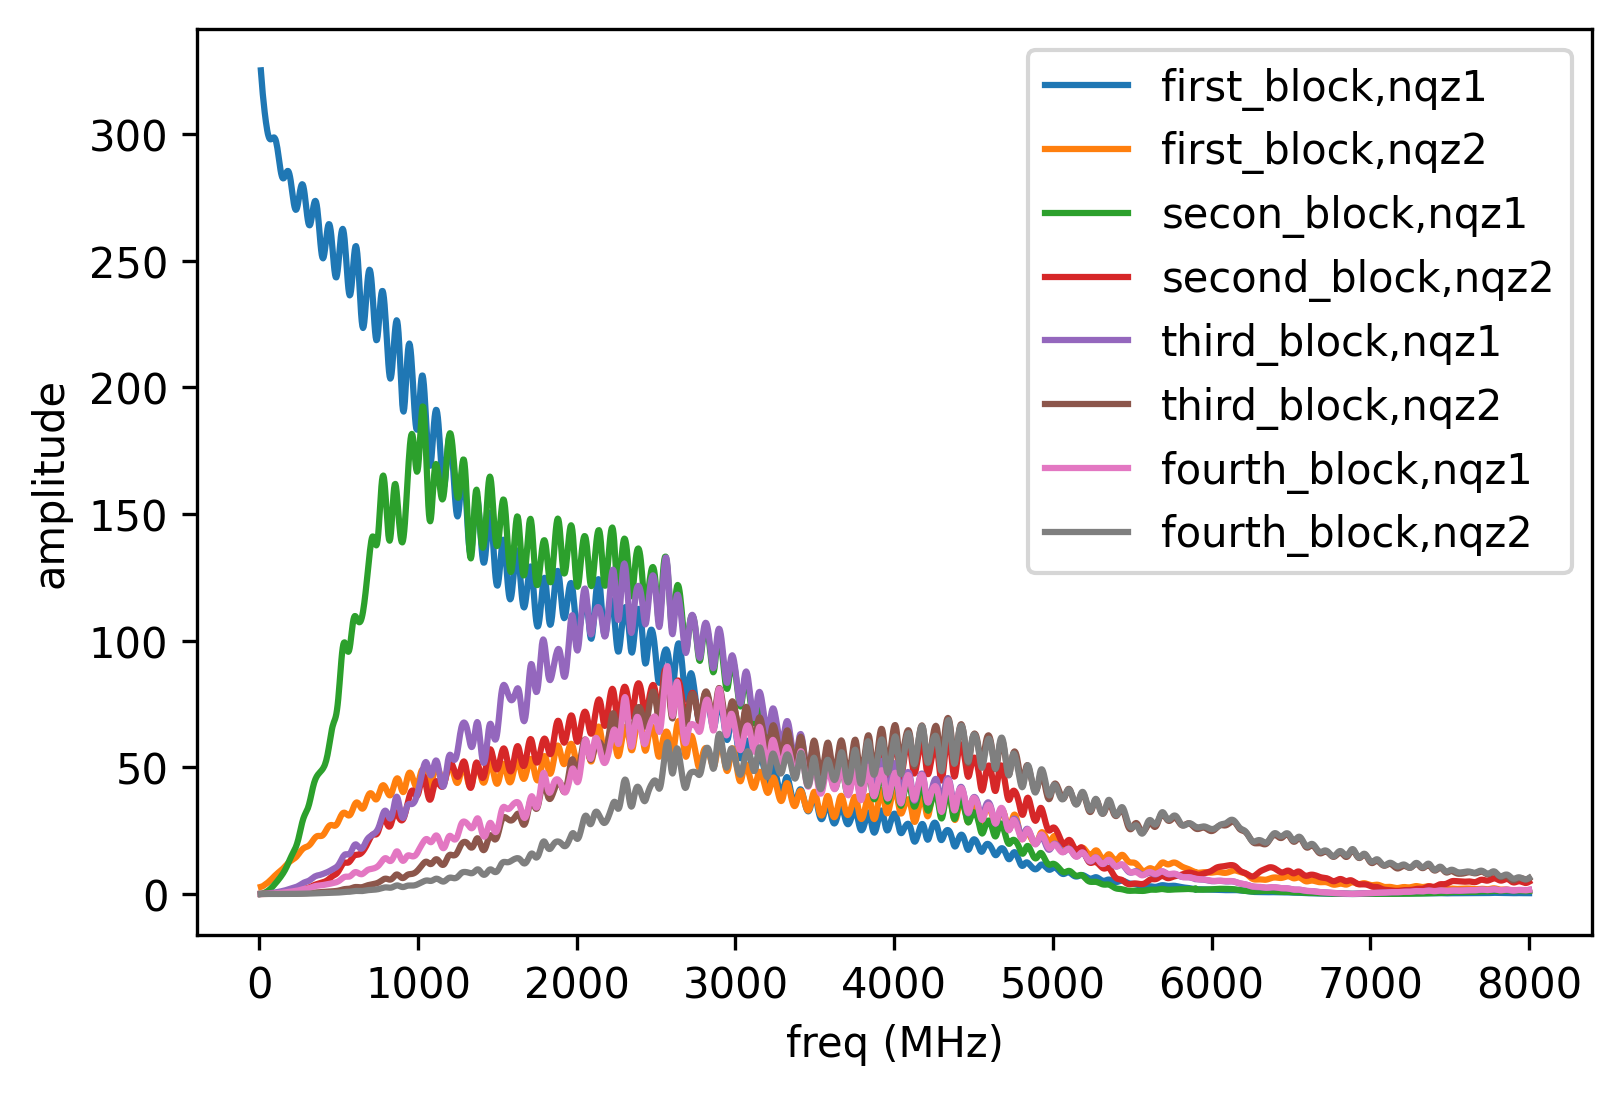

In [49]:
plt.plot(heja1["pulse_freq"], abs(heja1["avg_q"]+1j*heja1["avg_i"]), label="first_block,nqz1")
plt.plot(heja2["pulse_freq"], abs(heja2["avg_q"]+1j*heja2["avg_i"]), label="first_block,nqz2")
plt.plot(heja3["pulse_freq"], abs(heja3["avg_q"]+1j*heja3["avg_i"]), label="secon_block,nqz1")
plt.plot(heja4["pulse_freq"], abs(heja4["avg_q"]+1j*heja4["avg_i"]), label="second_block,nqz2")
plt.plot(heja5["pulse_freq"], abs(heja5["avg_q"]+1j*heja5["avg_i"]), label="third_block,nqz1")
plt.plot(heja6["pulse_freq"], abs(heja6["avg_q"]+1j*heja6["avg_i"]), label="third_block,nqz2")
plt.plot(heja7["pulse_freq"], abs(heja7["avg_q"]+1j*heja7["avg_i"]), label="fourth_block,nqz1")
plt.plot(heja8["pulse_freq"], abs(heja8["avg_q"]+1j*heja8["avg_i"]), label="fourth_block,nqz2")
plt.xlabel("freq (MHz)")
plt.ylabel("amplitude")
plt.legend()

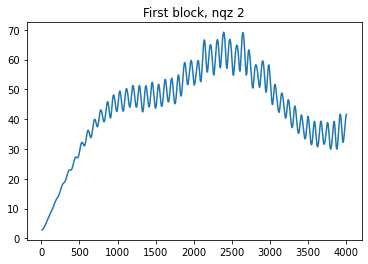

In [18]:
plt.title("First block, nqz 2")
plt.plot(ds1["pulse_freq"], abs(ds1["avg_q"]+1j*ds1["avg_i"]))

Starting experimental run with id: 1188. 


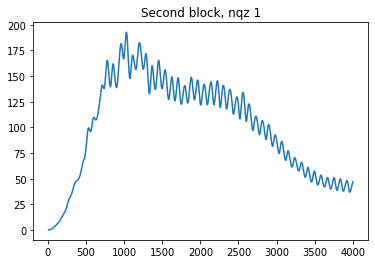

In [20]:
plt.title("Second block, nqz 1")
plt.plot(ds1["pulse_freq"], abs(ds1["avg_q"]+1j*ds1["avg_i"]))

In [21]:
station.zcu.nqz(2)
station.zcu.qubit_ch(4)
t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [10,8000,2000]}, protocol = NDSweepProtocol())
ds1 = qc.load_by_id(t1p).to_xarray_dataset()

Starting experimental run with id: 1189. 


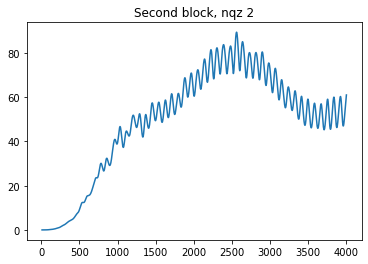

In [23]:
plt.title("Second block, nqz 2")
plt.plot(ds1["pulse_freq"], abs(ds1["avg_q"]+1j*ds1["avg_i"]))

### T1 decay testing

In [3]:
station.zcu.print_readable_snapshot()

zcu:
	parameter      value
--------------------------------------------------------------------------------
IDN             :	{'vendor': None, 'model': 'zcu', 'serial': None, 'firmware'...
adc_trig_offset :	100 (Clock ticks)
cavity_ch       :	6 
cavity_freq     :	500 (MHz)
cavity_gain     :	10000 (DAC units)
cavity_phase    :	0 (deg)
delay_time      :	3 (us)
nqz             :	1 
pulse_freq      :	500 (MHz)
pulse_gain      :	10000 (DAC units)
pulse_length    :	10 (us)
pulse_phase     :	0 (deg)
qubit_ch        :	4 
readout_length  :	12 (us)
relax_delay     :	0.1 (us)
reps            :	100 
res_ch          :	0 
soft_avgs       :	1 
t1_sigma        :	0.025 (us)


In [10]:
station.zcu.qubit_ch(6)
socket = station.troubleshoot()
socket.cycles2us(200)

0.4650297619047619

### This is an inefficient quick program for checking for the optimal adc trig offset

Starting experimental run with id: 1134. 
Starting experimental run with id: 1135. 
Starting experimental run with id: 1136. 
Starting experimental run with id: 1137. 
Starting experimental run with id: 1138. 
Starting experimental run with id: 1139. 
Starting experimental run with id: 1140. 
Starting experimental run with id: 1141. 
Starting experimental run with id: 1142. 
Starting experimental run with id: 1143. 
Starting experimental run with id: 1144. 
Starting experimental run with id: 1145. 
Starting experimental run with id: 1146. 
Starting experimental run with id: 1147. 
Starting experimental run with id: 1148. 
Starting experimental run with id: 1149. 
Starting experimental run with id: 1150. 
Starting experimental run with id: 1151. 
Starting experimental run with id: 1152. 
Starting experimental run with id: 1153. 
Starting experimental run with id: 1154. 
Starting experimental run with id: 1155. 
Starting experimental run with id: 1156. 
Starting experimental run with id:

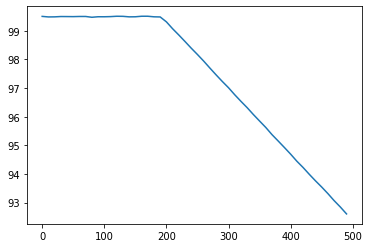

In [9]:
avgs = []
adc_trig_offsets = []
for i in range(0,500,10):
    
    station.zcu.adc_trig_offset(i)
    t1p = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [1000,4000,200]}, protocol = NDSweepProtocol())
    ds1 = qc.load_by_id(t1p).to_xarray_dataset()
    adc_trig_offsets.append(i)
    avgs.append(np.mean(abs(ds1["avg_q"]+1j*ds1["avg_i"])))

plt.plot(adc_trig_offsets, avgs)

In [21]:
data = abs(ds1["avg_q"]+1j*ds1["avg_i"])

<xarray.DataArray ()>
array(0.00322369)

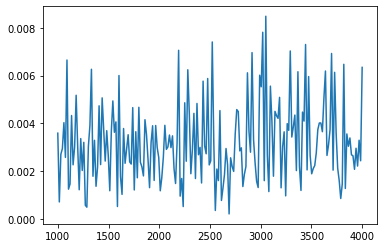

In [11]:
ds1 = qc.load_by_id(t1p).to_xarray_dataset()
plt.plot(ds1["pulse_freq"], abs(ds1["avg_q"]+1j*ds1["avg_i"]))


(0.0, 400.0)

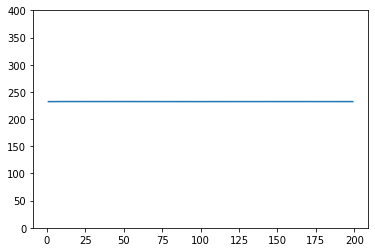

### Frequency sweep testing

In [3]:
#A simple frequency sweep, demonstrating the difference between the nyquist zones

#You can individually set parameter values
station.zcu.pulse_gain(100)
station.zcu.pulse_freq(1000)
station.zcu.reps(400)
station.zcu.relax_delay(500)
station.zcu.pulse_length(2)

#Setting the nyquist zone to 1
station.zcu.nqz(1)



In [11]:
run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [500,1000,20]}, protocol = NDSweepProtocol())


Starting experimental run with id: 777. 


In [6]:
station.zcu.nqz(1)
run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [1000,2000,20]}, protocol = NDSweepProtocol())
run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [2000,3000,20]}, protocol = NDSweepProtocol())
run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [3000,4000,20]}, protocol = NDSweepProtocol())


Starting experimental run with id: 798. 
Starting experimental run with id: 799. 
Starting experimental run with id: 800. 


In [5]:
station.zcu.nqz(2)
station.zcu.pulse_gain(20000)

run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [4700,4900,20]}, protocol = NDSweepProtocol())


Starting experimental run with id: 797. 


In [33]:
station.zcu.nqz(2)
station.zcu.pulse_freq(4300)
run_id_nqz1 = station.measure_iq(params_and_values = {station.zcu.pulse_gain: [30000,10000,20]}, protocol = NDSweepProtocol())


Starting experimental run with id: 759. 


In [3]:
soc = station.troubleshoot()

We can then access the database, and inspect our results.

/usr/local/share/pynq-venv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Text(0, 0.5, 'Amplitude')

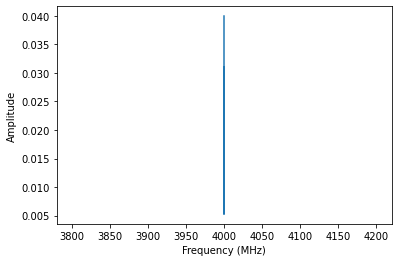

In [43]:
#Plotting the results
ds1 = qc.load_by_id(run_id_nqz1).to_xarray_dataset()


plt.plot(ds1["pulse_freq"], abs(ds1["avg_q"] + 1j*ds1["avg_i"]))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')


### Two dimensional sweep measurement, pulse gain and phase.

Multidimensional sweeping is simple, you just add another element into the params_and_values dictionary.

In [32]:
#Since we have implemented multidimensional sweeping, we may do a sweep of phase over gain 
station.zcu.reps(5)
phase_over_gain_id = station.measure_iq(params_and_values = {
    station.zcu.pulse_phase: [0,360,200],
    station.zcu.pulse_gain: [1000, 10000, 200]},
    protocol = NDSweepProtocol())

ds_gain_phase = qc.load_by_id(phase_over_gain_id).to_xarray_dataset()

Starting experimental run with id: 412. 


Text(0, 0.5, 'Phase (degrees)')

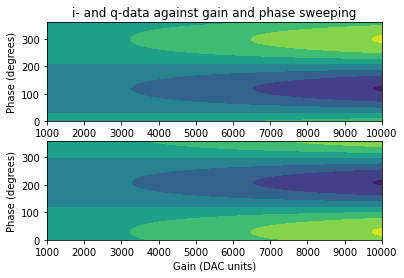

In [33]:
#We may then separately plot the i and q data against gain and phase

plt.subplot(2, 1, 1)
plt.contourf(ds_gain_phase["pulse_gain"], ds_gain_phase["pulse_phase"] , ds_gain_phase["avg_q"])
plt.title('i- and q-data against gain and phase sweeping')
plt.ylabel('Phase (degrees)')


plt.subplot(2, 1, 2)
plt.contourf(ds_gain_phase["pulse_gain"], ds_gain_phase["pulse_phase"] , ds_gain_phase["avg_i"])
plt.xlabel('Gain (DAC units)')
plt.ylabel('Phase (degrees)')

Text(0, 0.5, 'Phase (degrees)')

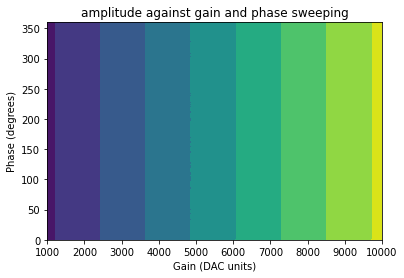

In [34]:
#The amplitude from the previous sweep
plt.contourf(ds_gain_phase["pulse_gain"], ds_gain_phase["pulse_phase"], abs(ds_gain_phase["avg_q"]+1j*ds_gain_phase["avg_i"]))
plt.title('amplitude against gain and phase sweeping')
plt.xlabel('Gain (DAC units)')
plt.ylabel('Phase (degrees)')

### Band-pass filter

This example is here just for my own curiosity

In [14]:
#Frequency sweep using a bandpass filter 1.35-1.45 GHz

station.zcu.pulse_gain(20000)
station.zcu.nqz(1)
bandpass_run_id = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [500,2500,1000]}, protocol = NDSweepProtocol())

Starting experimental run with id: 398. 


In [15]:
no_bandpass_run_id = station.measure_iq(params_and_values = {station.zcu.pulse_freq: [500,2500,1000]}, protocol = NDSweepProtocol())

Starting experimental run with id: 399. 


Text(0, 0.5, 'Amplitude')

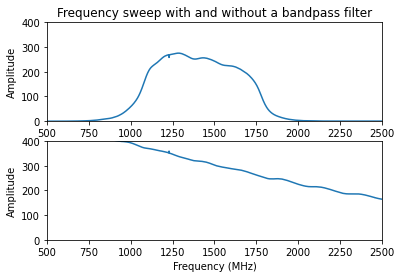

In [18]:
#Plotting the results
no_bp_ds = qc.load_by_id(no_bandpass_run_id).to_xarray_dataset()
bp_ds = qc.load_by_id(bandpass_run_id).to_xarray_dataset()

plt.subplot(2, 1, 1)
plt.plot(bp_ds["pulse_freq"], abs(bp_ds["avg_q"] + 1j*bp_ds["avg_i"]))
plt.ylim(0,400)
plt.xlim(500,2500)
plt.title('Frequency sweep with and without a bandpass filter')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(no_bp_ds["pulse_freq"], abs(no_bp_ds["avg_q"] + 1j*no_bp_ds["avg_i"]))
plt.ylim(0,400)
plt.xlim(500,2500)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')

In [28]:
station.zcu.pulse_gain(10000)
station.zcu.nqz(1)
pulse_len_run_id = station.measure_iq(params_and_values = {station.zcu.pulse_length: [20,150,100]}, protocol = NDSweepProtocol())

Starting experimental run with id: 411. 


In [29]:
ds1 = qc.load_by_id(pulse_len_run_id).to_xarray_dataset()
ds1

<xarray.Dataset>
Dimensions:       (pulse_length: 100)
Coordinates:
  * pulse_length  (pulse_length) float64 5.984e+05 5.99e+05 ... 6.543e+05
Data variables:
    avg_i         (pulse_length) float64 276.6 276.6 276.6 ... 276.6 276.6 276.6
    avg_q         (pulse_length) float64 149.7 149.7 149.8 ... 149.8 149.8 149.8
Attributes: (12/14)
    ds_name:                  results
    sample_name:              NDSweepMeasurement
    exp_name:                 zcu_qcodes_test
    snapshot:                 {"station": {"instruments": {"zcu": {"functions...
    guid:                     aaaaaaaa-0000-0000-0000-018b427eb57f
    run_timestamp:            2023-10-18 11:14:42
    ...                       ...
    captured_counter:         66
    run_id:                   411
    run_description:          {"version": 3, "interdependencies": {"paramspec...
    parent_dataset_links:     []
    run_timestamp_raw:        1697627682.279393
    completed_timestamp_raw:  1697627682.5368273

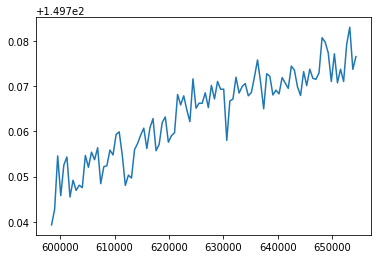

In [31]:
plt.plot(ds1["pulse_length"], ds1['avg_q'])